<a href="https://colab.research.google.com/github/LonnieSly/Italian_Restaurant_Sales_Analysis/blob/main/Italian_Restaurant_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set some visualization styles
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

print('Libraries imported successfully!')

Libraries imported successfully!


In [3]:
# Load the dataset
# Replace with the actual file name
df = pd.read_csv("large_italian_restaurant_sales.csv")

# Display the first 5 rows to get an overview
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Date,Time,Menu Item,Category,Quantity,Price (per item),Revenue,Payment Method,Customer Type
0,2024-11-23,03:48 AM,Margherita Pizza,Main Course,3,10.0,30.0,Credit Card,Dine-In
1,2024-03-12,03:29 AM,Caprese Salad,Appetizer,1,8.0,8.0,Mobile Payment,Takeaway
2,2024-01-17,01:01 AM,Tiramisu,Dessert,2,6.5,13.0,Credit Card,Delivery
3,2024-11-04,12:54 AM,Caprese Salad,Appetizer,2,8.0,16.0,Mobile Payment,Delivery
4,2024-12-25,06:36 PM,Gelato,Dessert,2,4.5,9.0,Cash,Delivery


In [4]:
# Get a concise summary of the dataframe
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              10000 non-null  object 
 1   Time              10000 non-null  object 
 2   Menu Item         10000 non-null  object 
 3   Category          10000 non-null  object 
 4   Quantity          10000 non-null  int64  
 5   Price (per item)  10000 non-null  float64
 6   Revenue           10000 non-null  float64
 7   Payment Method    10000 non-null  object 
 8   Customer Type     10000 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 703.3+ KB


In [5]:
# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [6]:
# Convert 'Date' and 'time' to a single datetime column for easier analysis
# This is a crucial step for time-series analysis
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [7]:
# Verify the revenue calculation. This is a great data quality check.
# If 'revenue' is not provided, you would calculate it: df['revenue'] = df['quantity'] * df['price']
# If it is, let's check for inconsistencies.
calculated_revenue = df['Quantity'] * df['Price (per item)']
if not np.allclose(df['Revenue'], calculated_revenue):
    print("Warning: The 'Revenue' column doesn't match 'Quantity' * 'Price (per item)' for all rows.")
    # For this project, we'll trust the pre-calculated revenue, but this is a good check.

In [8]:
# Clean up column names (e.g., remove spaces, make lowercase) for easier access
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
# Extract day of the week (Monday=0, Sunday=6)
df['day_of_week'] = df['datetime'].dt.dayofweek
# You can map this to actual day names for better readability in plots
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_map)

# Extract the hour of the day
df['hour'] = df['datetime'].dt.hour

print("\nCleaned DataFrame with new features:")
df.head()


Cleaned DataFrame with new features:


,date,time,menu_item,category,quantity,price_(per_item),revenue,payment_method,customer_type,datetime,day_of_week,day_name,hour
0,2024-11-23,03:48 AM,Margherita Pizza,Main Course,3,10.0,30.0,Credit Card,Dine-In,2024-11-23 03:48:00,5,Saturday,3
1,2024-03-12,03:29 AM,Caprese Salad,Appetizer,1,8.0,8.0,Mobile Payment,Takeaway,2024-03-12 03:29:00,1,Tuesday,3
2,2024-01-17,01:01 AM,Tiramisu,Dessert,2,6.5,13.0,Credit Card,Delivery,2024-01-17 01:01:00,2,Wednesday,1
3,2024-11-04,12:54 AM,Caprese Salad,Appetizer,2,8.0,16.0,Mobile Payment,Delivery,2024-11-04 00:54:00,0,Monday,0
4,2024-12-25,06:36 PM,Gelato,Dessert,2,4.5,9.0,Cash,Delivery,2024-12-25 18:36:00,2,Wednesday,18


/tmp/ipython-input-10-3465095035.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='revenue', data=hourly_sales, palette='viridis')


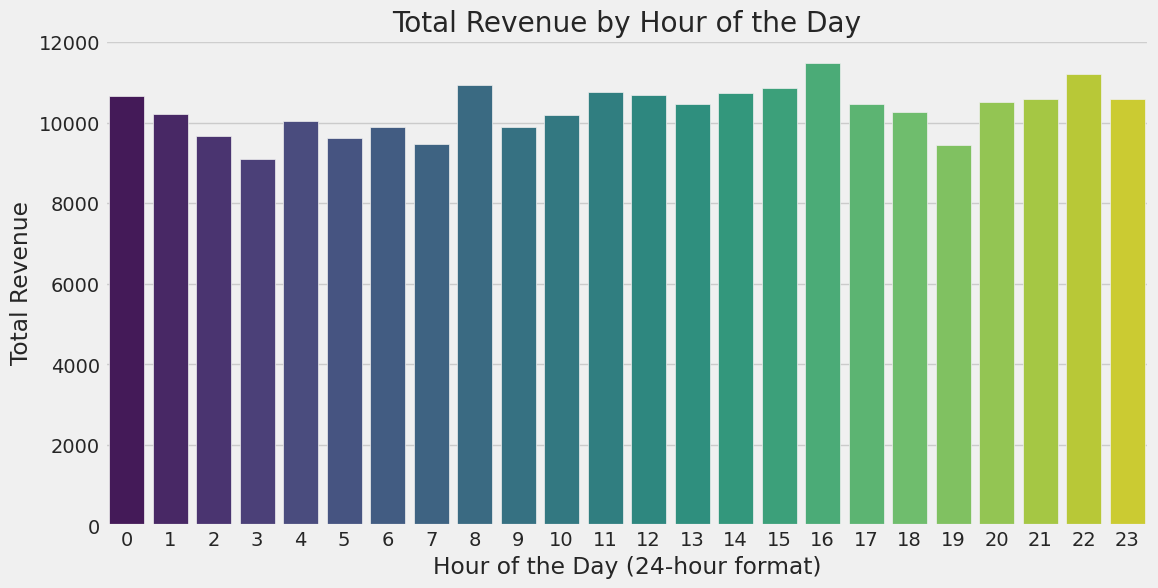

In [10]:
# Question 1: When are our busiest times?
# --- Analysis by Hour ---
hourly_sales = df.groupby('hour')['revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='revenue', data=hourly_sales, palette='viridis')
plt.title('Total Revenue by Hour of the Day')
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Total Revenue')
plt.show()

/tmp/ipython-input-11-970831302.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_name', y='revenue', data=daily_sales, palette='plasma')


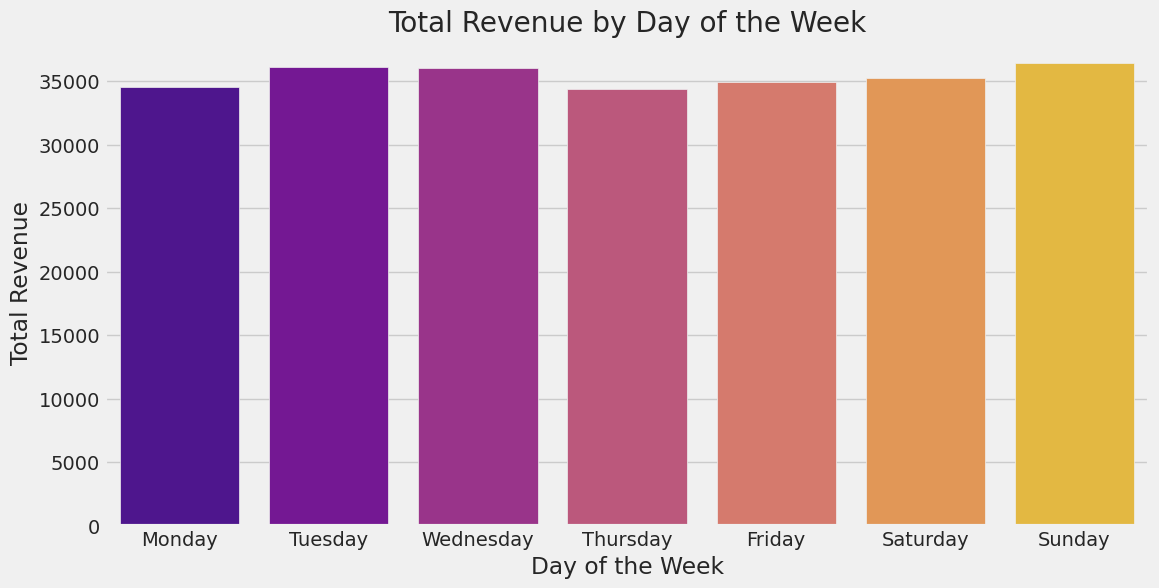

In [11]:
# --- Analysis by Day of the Week ---
daily_sales = df.groupby('day_name')['revenue'].sum().reindex(day_map.values()).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='day_name', y='revenue', data=daily_sales, palette='plasma')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.show()

/tmp/ipython-input-12-1912546033.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='menu_item', data=top_items, orient='h', palette='magma')


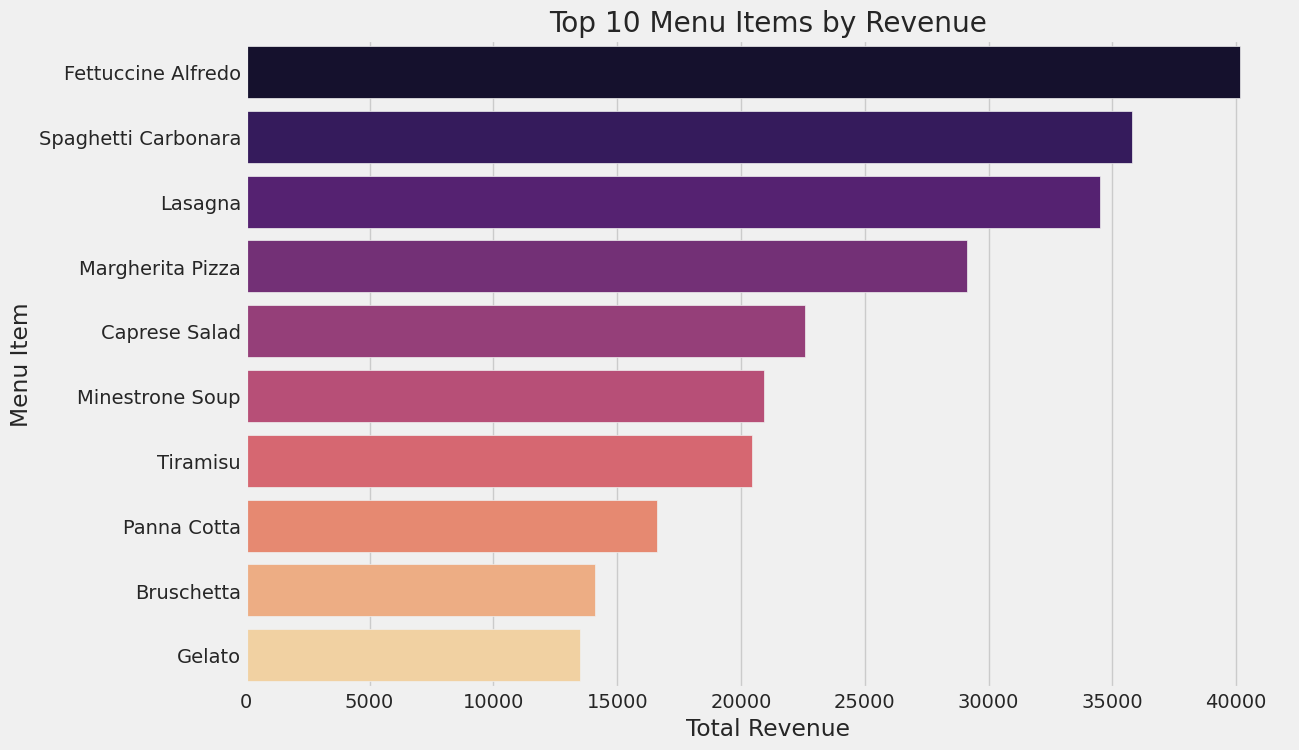

In [12]:
# Question 2: What are our best and worst-selling items?
# --- Top 10 Best-Selling Menu Items by Revenue ---
top_items = df.groupby('menu_item')['revenue'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='revenue', y='menu_item', data=top_items, orient='h', palette='magma')
plt.title('Top 10 Menu Items by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Menu Item')
plt.show()

/tmp/ipython-input-13-4053393921.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='revenue', data=category_sales, palette='cubehelix')


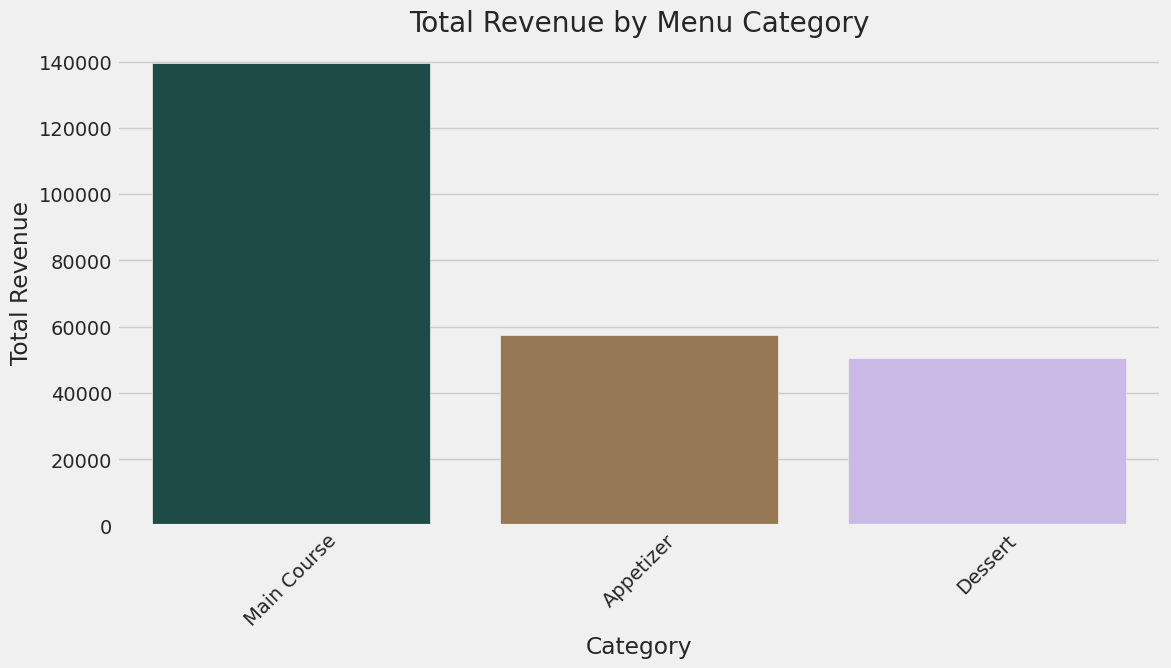

In [13]:
# --- Revenue by Category ---
category_sales = df.groupby('category')['revenue'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='revenue', data=category_sales, palette='cubehelix')
plt.title('Total Revenue by Menu Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

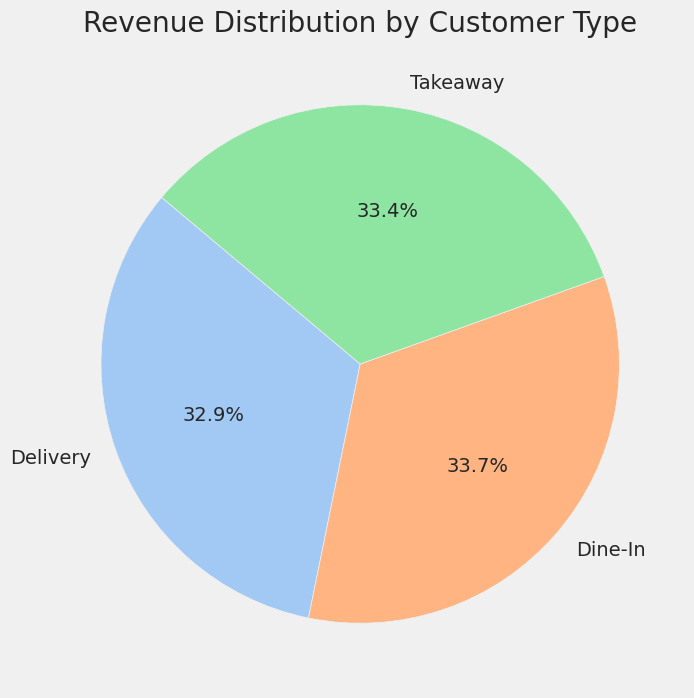

In [14]:
# Question 3: How do our customer segments behave?
# --- Revenue by Customer Type ---
customer_type_revenue = df.groupby('customer_type')['revenue'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(customer_type_revenue['revenue'], labels=customer_type_revenue['customer_type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Revenue Distribution by Customer Type')
plt.ylabel('') # Hides the 'revenue' label on the side
plt.show()


/tmp/ipython-input-15-429888711.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_type', y='revenue', data=avg_spend_customer, palette='coolwarm')


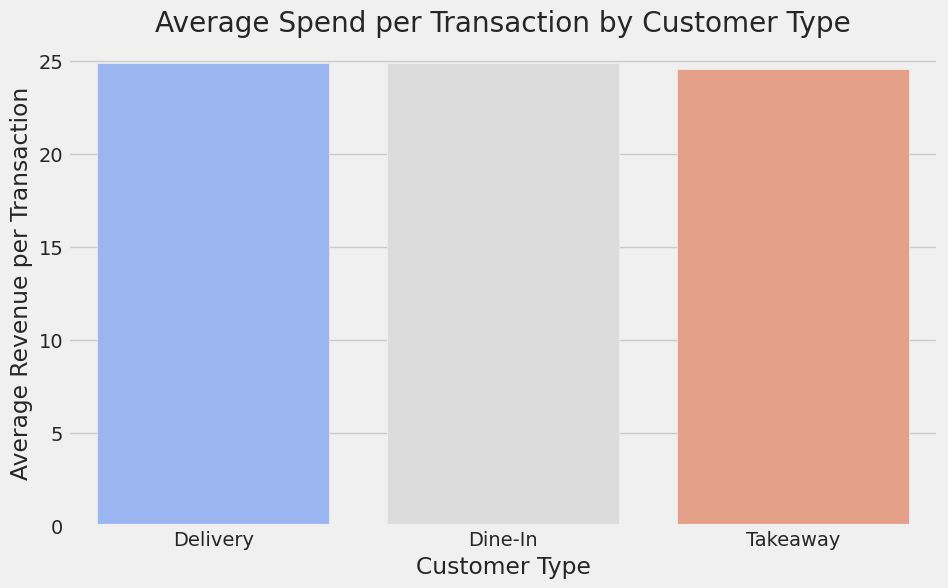

In [15]:
# --- Average Spend (Average Transaction Value) by Customer Type ---
avg_spend_customer = df.groupby('customer_type')['revenue'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='customer_type', y='revenue', data=avg_spend_customer, palette='coolwarm')
plt.title('Average Spend per Transaction by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Revenue per Transaction')
plt.show()

**The "Cloud" & "SQL" Part - Simulating a BigQuery Analysis**

In [16]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=307c910aa8e805c3d20dc871f6a7bd30a727febb6d678d886ef9d295c3c28af0
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [17]:
from pandasql import sqldf

# This function allows to run SQL queries on our pandas DataFrame
pysqldf = lambda q: sqldf(q, globals())

In [18]:
# SQL Query 1: Get total revenue per category, ordered from highest to lowest.
query1 = """
SELECT
    category,
    SUM(revenue) AS total_revenue
FROM
    df
GROUP BY
    category
ORDER BY
    total_revenue DESC;
"""

category_revenue_sql = pysqldf(query1)
print("--- Revenue by Category (from SQL query) ---")
print(category_revenue_sql)

--- Revenue by Category (from SQL query) ---
      category  total_revenue
0  Main Course       139581.5
1    Appetizer        57608.0
2      Dessert        50541.0


In [19]:
# SQL Query 2: Find the busiest day of the week and the total revenue for that day.
query2 = """
SELECT
    day_name,
    SUM(revenue) as total_revenue,
    COUNT(DISTINCT date) as number_of_days -- To show it's not just one lucky day
FROM
    df
GROUP BY
    day_name
ORDER BY
    total_revenue DESC
LIMIT 3;
"""

busiest_days_sql = pysqldf(query2)
print("\n--- Top 3 Busiest Days (from SQL query) ---")
print(busiest_days_sql)


--- Top 3 Busiest Days (from SQL query) ---
    day_name  total_revenue  number_of_days
0     Sunday        36454.5              52
1    Tuesday        36098.5              52
2  Wednesday        36013.0              52
